# Introduction to QuTiP

In [1]:
import qutip
import pylab as plt
import numpy as np
from qutip_ext_animation import plot_animation

In this course we will use <a href="http://qutip.org">QuTiP</a>, which is an open-source software for simulating dynamics of quantum systems. Here we use a modified version of tutorial from official website. You can find more wonderful examples at their <a href="http://qutip.org/tutorials.html">tutorial sections</a>.

## Quantum object class: `Qobj`

At the heart of the QuTiP package is the `Qobj` class, which is used for representing quantum objects such as states and operators.

The `Qobj` class contains all the information required to describe a quantum system, such as its matrix representation, composite structure and dimensionality. 

### Creating and inspecting quantum objects

We can create a new quantum object using the `Qobj` class constructor, like this:

In [2]:
q = qutip.Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

We can inspect the properties of a `Qobj` instance using the various class methods:

In [3]:
# the shape of the matrix data representation
q.shape

(2, 1)

In [4]:
# get the matrix representation
q.full()

array([[1.+0.j],
       [0.+0.j]])

### Using `Qobj` instances for calculations

With `Qobj` instances we can do arithmetic and apply a number of different operations using class methods:

In [5]:
sx = qutip.Qobj([[0,1], [1,0]])  # the sigma-x Pauli operator

sx

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [6]:
sy = qutip.Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator

sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [7]:
sz = qutip.Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator

sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Some arithmetic with quantum objects:

In [8]:
H = 1.0 * sz + 0.1 * sy

H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

Example of modifying quantum objects using the `Qobj` methods:

In [9]:
# The hermitian conjugate
sz.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [10]:
# The trace
H.tr()

0.0

In [11]:
# Eigenenergies
H.eigenenergies()

array([-1.00498756,  1.00498756])

In [12]:
# Eigenstates
H.eigenstates()

(array([-1.00498756,  1.00498756]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.0498137+0.j        ]
  [ 0.       +0.99875853j]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.99875853+0.j       ]
  [ 0.        -0.0498137j]]], dtype=object))

For a complete list of methods and properties of the `Qobj` class, see the <a href="http://qutip.org/docs/latest/index.html">QuTiP documentation</a>.

## States and operators

Normally we do not need to create `Qobj` instances from stratch, using its constructor and passing its matrix represantation as argument. Instead we can use functions in QuTiP that generates common states and operators for us. Here are some examples of built-in state functions:

### State vectors

Fundamental basis states (Fock states of oscillator modes):

In [13]:
N = 3 # number of states in the Hilbert space
n = 1 # the state that will be occupied

qutip.basis(N, n)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]]

Coherent state:
$$|\alpha \rangle = e^{-\dfrac{|\alpha|^2}{2}} \sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}} |n\rangle.$$

In [14]:
qutip.coherent(N=4, alpha=0)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

### Density matrices

A fock state as density matrix:

In [15]:
qutip.fock_dm(5, 3) # 5 = hilbert space size, 3 = state that is occupied

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]

A coherent state as density matrix:

In [16]:
qutip.coherent_dm(N=5, alpha=0)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

### Operators

In [17]:
# Identity operator
qutip.qeye(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

In [18]:
# Number operator
qutip.num(8)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7.]]

Qubit (two-level system) operators:

In [19]:
# Pauli sigma x
qutip.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [20]:
# Pauli sigma y
qutip.sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [21]:
# Pauli sigma z
qutip.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Harmonic oscillator operators:

In [22]:
# annihilation operator

qutip.destroy(N=5) # N = number of fock states included in the Hilbert space

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         1.73205081 0.        ]
 [0.         0.         0.         0.         2.        ]
 [0.         0.         0.         0.         0.        ]]

In [23]:
# creation operator

qutip.create(N=5) # equivalent to destroy(5).dag()

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.        ]
 [0.         0.         0.         2.         0.        ]]

In [24]:
# the position operator is easily constructed from the annihilation operator
a = qutip.destroy(5)

x = a + a.dag()

x

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [1.         0.         1.41421356 0.         0.        ]
 [0.         1.41421356 0.         1.73205081 0.        ]
 [0.         0.         1.73205081 0.         2.        ]
 [0.         0.         0.         2.         0.        ]]

In [25]:
a.dag()

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.        ]
 [0.         0.         0.         2.         0.        ]]

In [26]:
hwr = 1.0

#H = hwr*(qutip.create(5) * qutip.destroy(5) + 0.5) 
H = hwr*(a.dag() * a + 0.5) 

H

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0.  0. ]
 [0.  1.5 0.  0.  0. ]
 [0.  0.  2.5 0.  0. ]
 [0.  0.  0.  3.5 0. ]
 [0.  0.  0.  0.  4.5]]

#### Using `Qobj` instances we can check some well known commutation relations:

In [27]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

$[a, a^\dagger] = 1$

In [28]:
a = qutip.destroy(7)

commutator(a, a.dag())

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -6.]]

**Ops...** The result is not identity! Why? Because we have truncated the Hilbert space. But that's OK as long as the highest Fock state isn't involved in the dynamics in our truncated Hilbert space. If it is, the approximation that the truncation introduces might be a problem.

$[x,p] = i$

In [29]:
x =       (a + a.dag())/np.sqrt(2)
p = -1j * (a - a.dag())/np.sqrt(2)

In [30]:
commutator(x, p)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-6.j]]

Same issue with the truncated Hilbert space, but otherwise OK.

Let's try some Pauli spin inequalities

$[\sigma_x, \sigma_y] = 2i \sigma_z$

In [31]:
commutator(qutip.sigmax(), qutip.sigmay()) - 2j * qutip.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

$-i \sigma_x \sigma_y \sigma_z = \mathbf{1}$

In [32]:
-1j * qutip.sigmax() * qutip.sigmay() * qutip.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

$\sigma_x^2 = \sigma_y^2 = \sigma_z^2 = \mathbf{1}$

In [33]:
qutip.sigmax()**2 == qutip.sigmay()**2 == qutip.sigmaz()**2 == qutip.qeye(2)

True

## Composite systems

In most cases we are interested in coupled quantum systems, for example coupled qubits, a qubit coupled to a cavity (oscillator mode), etc.

To define states and operators for such systems in QuTiP, we use the `tensor` function to create `Qobj` instances for the composite system.

For example, consider a system composed of two qubits. If we want to create a Pauli $\sigma_z$ operator that acts on the first qubit and leaves the second qubit unaffected (i.e., the operator $\sigma_z \otimes \mathbf{1}$), we would do:

In [34]:
sz1 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))

sz1

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

We can easily verify that this two-qubit operator does indeed have the desired properties:

In [35]:
psi1 = qutip.tensor(qutip.basis(2,1), qutip.basis(2,0)) # excited first qubit
psi2 = qutip.tensor(qutip.basis(2,0), qutip.basis(2,1)) # excited second qubit

In [36]:
psi1.dims

[[2, 2], [1, 1]]

In [37]:
sz1 * psi1 == psi1 # this should not be true, because sz1 should flip the sign of the excited state of psi1

False

In [38]:
sz1 * psi2 == psi2 # this should be true, because sz1 should leave psi2 unaffected

True

If we want to do the same thing for the second qubit we can do:

In [39]:
sz2 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())

sz2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

Note the order of the argument to the `tensor` function, and the correspondingly different matrix representation of the two operators `sz1` and `sz2`.

Using the same method we can create coupling terms of the form $\sigma_x \otimes \sigma_x$:

In [40]:
qutip.tensor(qutip.sigmax(), qutip.sigmax())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Now we are ready to create a `Qobj` representation of a coupled two-qubit Hamiltonian: $H = \epsilon_1 \sigma_z^{(1)} + \epsilon_2 \sigma_z^{(2)} + g \sigma_x^{(1)}\sigma_x^{(2)}$

In [41]:
epsilon = [1.0, 1.0]
g = 0.1

sz1 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))
sz2 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())

H = epsilon[0] * sz1 + epsilon[1] * sz2 + g * qutip.tensor(qutip.sigmax(), qutip.sigmax())

H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.   0.   0.   0.1]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.1  0.   0. ]
 [ 0.1  0.   0.  -2. ]]

### Jaynes-Cummings model

To create composite systems of different types, all we need to do is to change the operators that we pass to the `tensor` function (which can take an arbitrary number of operator for composite systems with many components).

For example, the Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form) the Jaynes-Cumming Hamiltonian for a qubit-cavity system with the rotating-wave approximation :<br><br>$$H_{RWA} = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g (a \sigma_+ + a^\dagger \sigma_-)$$<br>
where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength.

In [42]:
wc = 1.0 # cavity frequency
wa = 1.0 # qubit/atom frenqency
g = 0.1  # coupling strength

# cavity mode operator
a = qutip.tensor(qutip.destroy(3), qutip.qeye(2))

# qubit/atom operators
sz = qutip.tensor(qutip.qeye(3), qutip.sigmaz())   # sigma-z operator
sm = qutip.tensor(qutip.qeye(3), qutip.destroy(2)) # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.        ]
 [ 0.          0.          0.          0.          0.          2.5       ]]

Note that 

$a \sigma_+ = (a \otimes \mathbf{1}) (\mathbf{1} \otimes \sigma_+)$

so the following two are identical:

In [46]:
a = qutip.tensor(qutip.destroy(3), qutip.qeye(2))
sp = qutip.tensor(qutip.qeye(3), qutip.create(2))

a * sp

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

In [47]:
qutip.tensor(qutip.destroy(3), qutip.create(2))

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

## Unitary dynamics

Unitary evolution of a quantum system in QuTiP can be calculated with the `mesolve` function. This module provides solvers for the Lindblad master equation and von Neumann equation.

`mesolve` is short for Master-eqaution solve (for dissipative dynamics), but if no collapse operators (which describe the dissipation) are given to the solve it falls back on the unitary evolution of the Schrodinger (for initial states in state vector for) or the von Neuman equation (for initial states in density matrix form). The Lindblad master equation for an N-dimensional system's density matrix ρ can be written as<br><br> $$\dot{\rho} = -\frac{i}{\hbar}[H, \rho]$$<br>

The evolution solvers in QuTiP returns a class of type `Odedata`, which contains the solution to the problem posed to the evolution solver. 

For example, considor a qubit with Hamiltonian $H = \sigma_x$ and initial state $\left|0\right>$ (in the sigma-z basis): Its evolution can be calculated as follows:

In [75]:
# Hamiltonian
H = qutip.sigmax()

# initial state
psi0 = qutip.basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = qutip.mesolve(H, psi0, tlist, [], [])

In [33]:
qutip.basis(2, 0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [76]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

The `result` object contains a list of the wavefunctions at the times requested with the `tlist` array. 

In [77]:
len(result.states)

100

In [78]:
result.states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.99490282+0.j        ]
  [0.        -0.10083839j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.97966324+0.j        ]
  [0.        -0.20064878j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.95443663+0.j        ]
  [0.        -0.29841367j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.91948017+0.j        ]
  [0.        -0.39313639j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.87515021+0.j        ]
  [0.        -0.48385132j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.82189869+0.j       ]
  [0.        -0.5696337j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.76026846+0.j        ]
  [0.        -0.649609

In [79]:
result.states[0] # the finial state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

### Expectation values

The expectation values of an operator given a state vector or density matrix (or list thereof) can be calculated using the `expect` function. 

In [53]:
qutip.expect(qutip.sigmaz(), result.states[-1])

0.4081017618645427

In [54]:
qutip.expect(qutip.sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

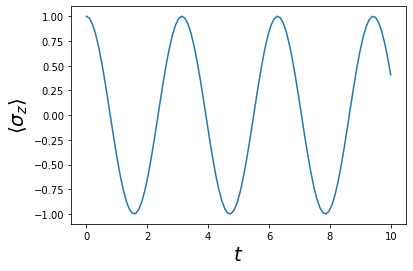

In [55]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, qutip.expect(qutip.sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);

If we are only interested in expectation values, we could pass a list of operators to the `mesolve` function that we want expectation values for, and have the solver compute then and store the results in the `Odedata` class instance that it returns.

For example, to request that the solver calculates the expectation values for the operators $\sigma_x, \sigma_y, \sigma_z$:

In [56]:
result = qutip.mesolve(H, psi0, tlist, [], [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()])

Now the expectation values are available in `result.expect[0]`, `result.expect[1]`, and `result.expect[2]`:

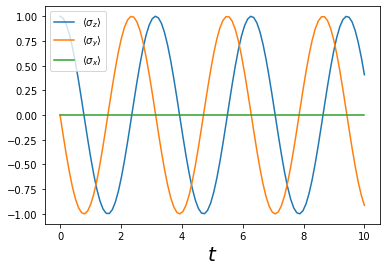

In [57]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, result.expect[2], label=r'$\left<\sigma_z\right>$')
axes.plot(tlist, result.expect[1], label=r'$\left<\sigma_y\right>$')
axes.plot(tlist, result.expect[0], label=r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.legend(loc=2);

## Dissipative dynamics

To add dissipation to a problem, all we need to do is to define a list of collapse operators to the call to the `mesolve` solver.

A collapse operator is an operator that describes how the system is interacting with its environment. 

For example, consider a quantum harmonic oscillator with Hamiltonian 

$H = \hbar\omega a^\dagger a$

and which loses photons to its environment with a relaxation rate $\kappa$. The collapse operator that describes this process is 

$\sqrt{\kappa} a$

since $a$ is the photon annihilation operator of the oscillator. 

To program this problem in QuTiP:

In [58]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = qutip.destroy(10)       # oscillator annihilation operator
rho0 = qutip.fock_dm(10, 5) # initial state, fock state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]

In [59]:
tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = qutip.mesolve(H, rho0, tlist, c_ops, [a.dag() * a]) 

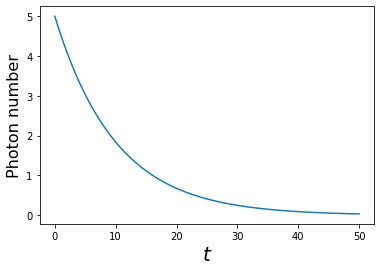

In [60]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);

In [37]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = qutip.sigmax() 
    sy = qutip.sigmay() 
    sz = qutip.sigmaz() 
    sm = qutip.sigmam()
    
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)

    # evolve and calculate expectation values
    output = qutip.mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output

In [38]:
w     = 1.0 * 2 * np.pi  # qubit angular frequency
theta =  0.5* np.pi      # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5             # qubit relaxation rate
gamma2 = 0.3             # qubit dephasing rate

a = 1.0
psi0 = (a*qutip.basis(2,0) + (1-a)*qutip.basis(2,1))/(np.sqrt(a**2 + (1-a)**2)) # initial state
tlist = np.linspace(0, 5, 1500) # time steps

In [39]:
result = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [ ]:
sphere = qutip.Bloch(figsize=(6,6), view=[-60, 30])
sphere.vector_color = ['r']
sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
plot_animation(result, sphere)

Show that $[e^{i\hat{\varphi}}, \hat{n}] = -e^{i\hat{\varphi}}$.

<b>Solution:</b> $$[e^{i\hat{\varphi}}, \hat{n}] = e^{i\hat{\varphi}}\hat{n} - \hat{n}e^{i\hat{\varphi}} = \sum\limits_{i=0}^{\infty}\left(\frac{(i\hat{\varphi})^k}{k!}\right)\hat{n} - \hat{n}\sum\limits_{i=0}^{\infty}\left(\frac{(i\hat{\varphi})^k}{k!}\right) = $$

$$ = \left(1 + i\hat{\varphi} - \frac{\hat{\varphi}^2}{2} - i\frac{\hat{\varphi}^3}{6} + \dots\right)\hat{n} - \hat{n}\left(1 + i\hat{\varphi} - \frac{\hat{\varphi}^2}{2} - i\frac{\hat{\varphi}^3}{6} + \dots\right) = -1 - \left(\frac{\hat{\varphi}^2}{2}\hat{n} - \hat{n}\frac{\hat{\varphi}^2}{2}\right) - \left(\frac{i\hat{\varphi}^3}{6}\hat{n} - \hat{n}\frac{i\hat{\varphi}^3}{6}\right) = $$
    
Let's consider the first bracket and use the commutation relationship $[\hat{\varphi}, \hat{n}] = i = \hat{\varphi}\hat{n} - \hat{n}\hat{\varphi}$:

$$\frac12\left(\hat{\varphi}\hat{\varphi}\hat{n} - \hat{n}\hat{\varphi}\hat{\varphi} \right) = \frac12\left(\hat{\varphi}\hat{\varphi}\hat{n} - (\hat{\varphi}\hat{n} - i)\hat{\varphi} \right) = \frac12\left(\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}\hat{n}\hat{\varphi} + i\hat{\varphi} \right) = \frac12\left(\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}(\hat{\varphi}\hat{n} - i) + i\hat{\varphi} \right) = \frac12\left(\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}\hat{\varphi}\hat{n} + \hat{\varphi}i + i\hat{\varphi} \right) = i\hat{\varphi}$$

Now, we turn to the second one:

$$\frac{i}{6}\left(\hat{\varphi}^3\hat{n} - \hat{n}\hat{\varphi}^3\right) = \frac{i}{6}\left(\hat{\varphi}\hat{\varphi}\hat{\varphi}\hat{n} - \hat{n}\hat{\varphi}\hat{\varphi}\hat{\varphi}\right) = \frac{i}{6}\left(\hat{\varphi}\hat{\varphi}\hat{n} - (\hat{\varphi}\hat{n} - i)\hat{\varphi}\hat{\varphi} \right) = \frac{i}{6}\left(\hat{\varphi}\hat{\varphi}\hat{\phi}\hat{n} - \hat{\varphi}\hat{n}\hat{\varphi}\hat{\varphi} + i\hat{\varphi}\hat{\varphi} \right) = \frac{i}{6}\left(\hat{\phi}\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}(\hat{\varphi}\hat{n} - i)\hat{\varphi} + i\hat{\varphi}\hat{\varphi} \right) = \frac{i}{6}\left(\hat{\phi}\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}\hat{\varphi}\hat{n}\hat{\varphi} + \hat{\varphi}i\hat{\varphi} + i\hat{\varphi}\hat{\varphi} \right) = \frac{i}{6}\left(\hat{\varphi}\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}\hat{\varphi}(\hat{\varphi}\hat{n} - i) + 2i\hat{\varphi}\hat{\varphi} \right) = \frac{i}{6}\left(\hat{\varphi}\hat{\varphi}\hat{\varphi}\hat{n} - \hat{\varphi}\hat{\varphi}\hat{\varphi}\hat{n} + 3i\hat{\varphi}\hat{\varphi} \right) =  -\frac{\hat{\varphi}^2}{2}$$

From these relations we can guess that $$[\hat{\varphi}^k,\hat{n}] = ik\hat{\varphi}^{k-1}$$ 
It can be easily proved by induction:

$$[\hat{\varphi}^{k+1},\hat{n}] = \hat{\varphi}^{k+1}\hat{n} - \hat{n}\hat{\varphi}^{k+1} = \hat{\varphi}^{k+1}\hat{n} - (\hat{\varphi}^k\hat{n} - ik\hat{\varphi}^{k-1})\hat{\varphi} = \hat{\varphi}^{k+1}\hat{n} - \hat{\varphi}^k\hat{n}\hat{\varphi} - ik\hat{\varphi}^{k} = \hat{\varphi}^{k+1}\hat{n} - \hat{\varphi}^k(\hat{\varphi}\hat{n} - i) + ik\hat{\varphi}^{k} = i\hat{\varphi}^{k} + ik\hat{\varphi}^{k} = i(k+1)\hat{\varphi}^{k}$$<br><br>
Finally, substituting to the initial expression, we get:
$$[e^{i\hat{\varphi}}, \hat{n}] = -1 - \sum\limits_{i=1}^{\infty}\left(\frac{(i\hat{\varphi})^k}{k!}\right) = - \sum\limits_{i=0}^{\infty}\left(\frac{(i\hat{\varphi})^k}{k!}\right) = - e^{i\hat{\varphi}}$$